## 실습목표

분류 모델의 활성화 맵을 이해합니다.

다양한 활성화 맵을 구하는 방법을 알아갑니다.

약지도학습(weakly supervised learning)을 이해합니다.

### 학습 내용

Explainable AI

CAM: Class Activation Map

Grad-CAM

ACoL: Adversarial Complementary Learning

----

## Explainable AI(XAI)

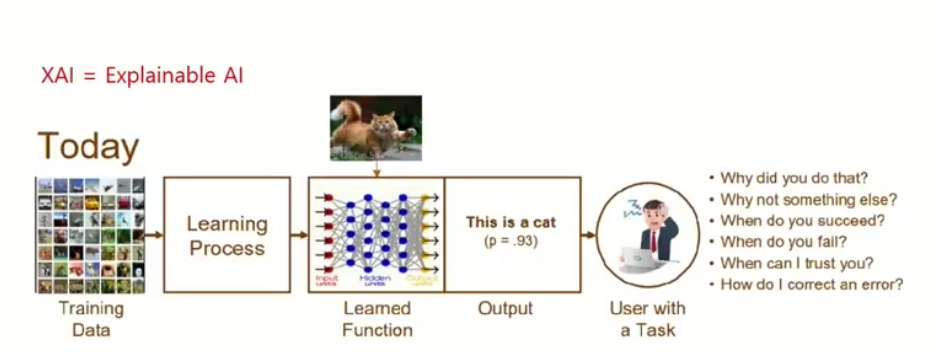

XAI는 모델이 동작을 잘하면 왜 잘하게 되었는지 못하면 어떻게 개선할 지에 대해서 설명을 하는 것입니다.

이로 인해 사람은 동작의 원리를 이해할 수 있고 기계의 오류를 파악하게 되어 수정과 개선이 가능해져서 더 좋고 안전한 AI를 만들어 낼 수 있게 됩니다.


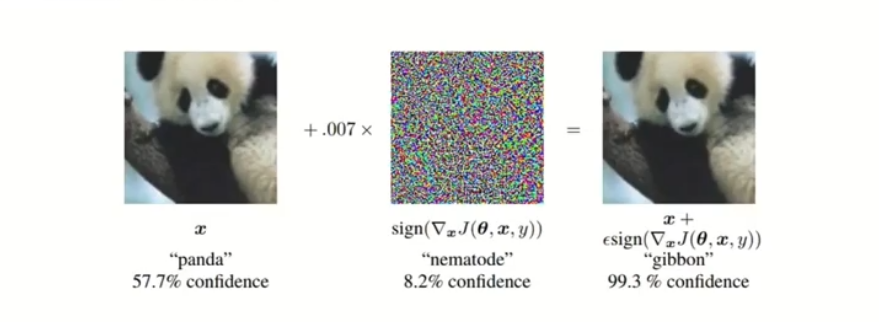

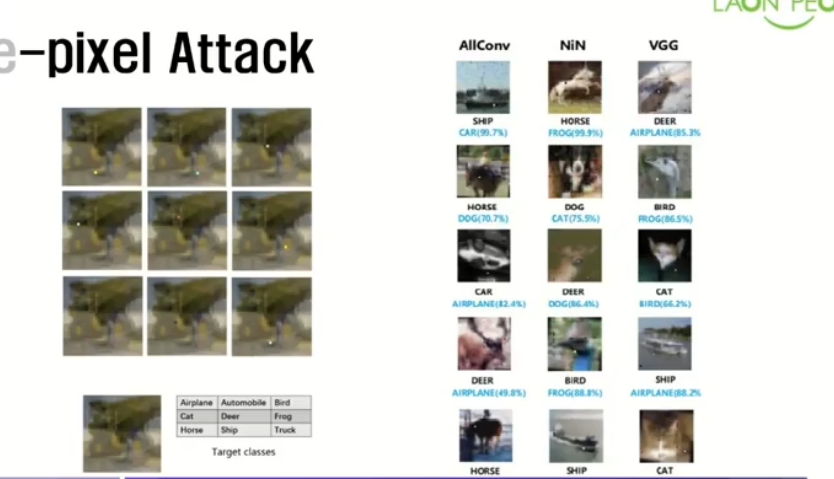

AI는 사실 간단한 변화만 줘도 다양하고 다른 결과를 낼 수 있습니다. 이로 인해서 악의적으로 변경할 경우 여러 피해가 올 수도 있습니다.

XAI를 이용하면 누군가 의도적으로 AI성능을 바꾸어서 벌어지는 여러 문제들을 미리 파악하여 해결할 수도 있게 됩니다.

하지만 아래의 사진처럼 가장 고도하고 성능이 좋은 Deep learning은 큰 단점이 있는데 그것은 설명을 하는 것이 어렵다 입니다.
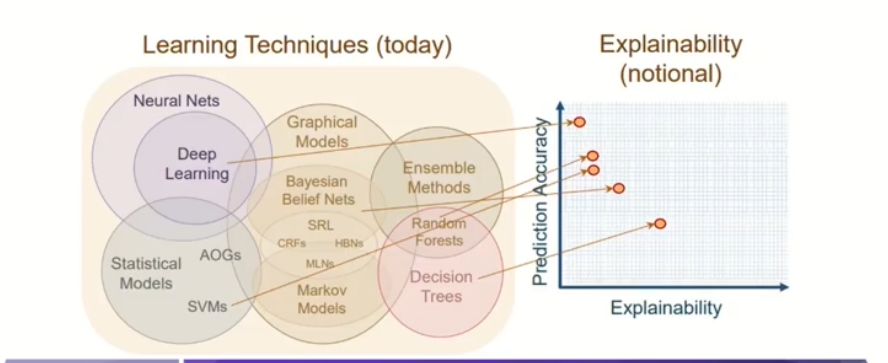


허나 저희의 원하는 목표는 당연히 모든 분야에서 뚜렷한 과정들을 하나 하나 설명하는 것입니다.


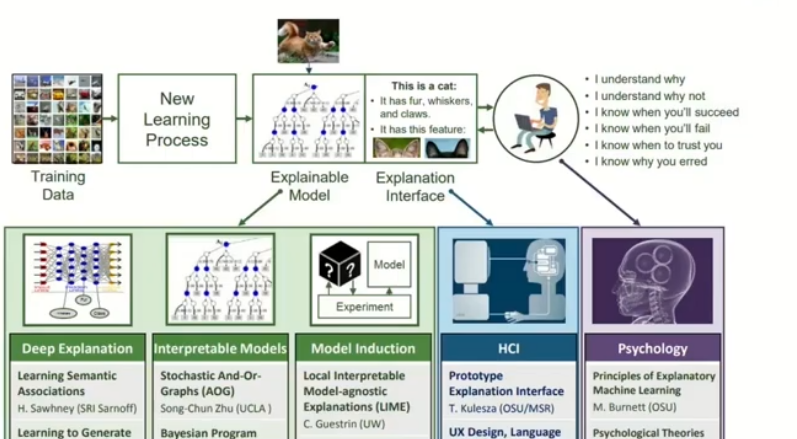


### 이미지 분류(Image Classification)

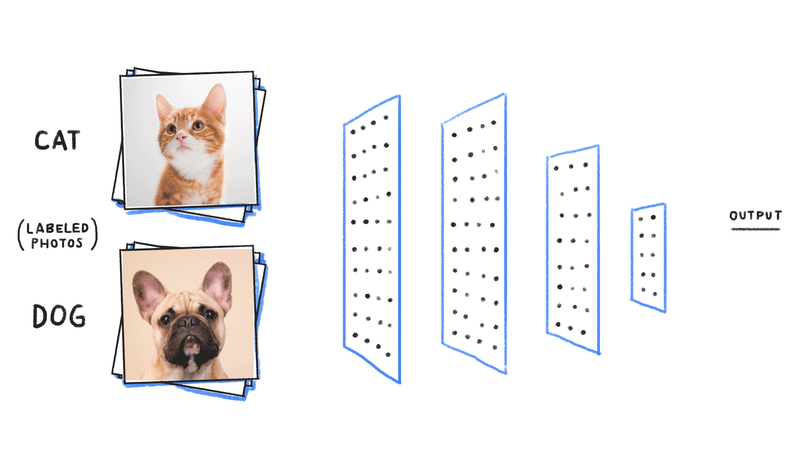

입력 이미지가 들어오면, 이미지의 local feature를 추출해야 하므로 입력 이미지를 backbone network(CNN) 통과시키면 feature map이 나오게 됩니다.

feautre map를 fc layer에 통과시켜 얻은 logit를 softmax 활성화함수에 통과 시키면, 이미지가 각 클래스에 속할 확률을 얻게 됩니다.


이미지 분류 모델은 이러한 방식으로 입력  이미지의 
클래스를 분류합니다.

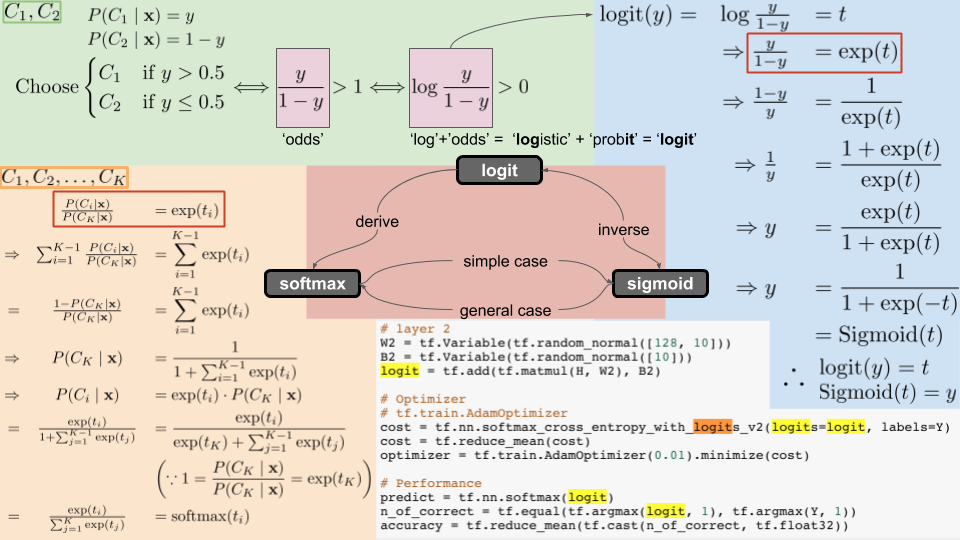

---

## CAM: Class Activation Map


CAM은 모델이 어떤 곳을 보고 어떤 클래스인지를 짐작하는지 확인하는 지도입니다.

### GAP(Global Average Pooling)

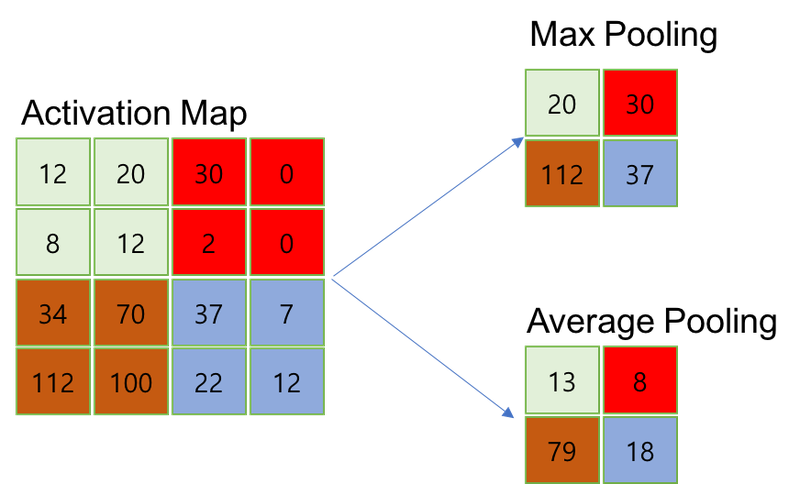

Average pooling과 Max pooling은 각 커널과 겹치는 영역에서 평균값을 취하는 것과 최댓값을 취하는 것입니다.


NIN논문에서, 우리는 보통 분류 모델의 마지막 부분에서 fc layer을 사용하는데 이 논문에서는 GAP를 사용합니다.

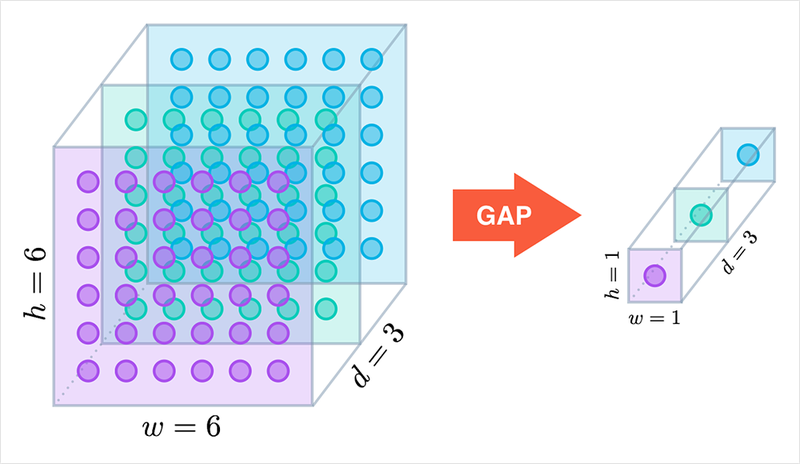

GAP는 매 채널별로, average pooling을 거쳐서 채널의 값이 나오고 이것이 전체에 global하게 적용이 됩니다.

그 후에, 연산 결과를 소프트맥스 활성화 함수에 적용하여 마지막 CNN layer의 채널 수는 데이터 클래스의 수에 맞추게 하면서 각 클래스에 따른 확률을 얻을 수 있게 됩니다.

그 결과, 클래스의 신뢰도가 나타나게 되어서 해석이 쉽고 별도의 최적화 파라미터가 존재하지 않아서 과적합을 방지할 수도 있게 됩니다.

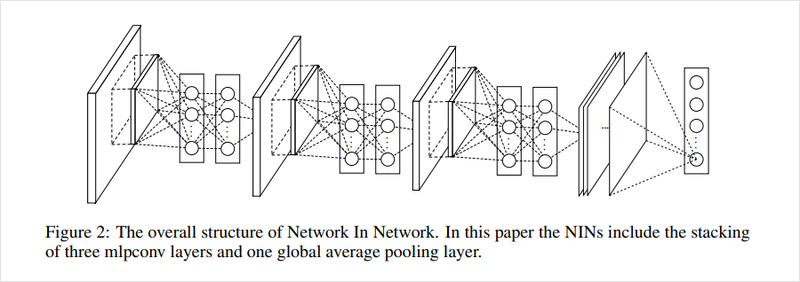


### CAM(Class Activation Map)

*수식적 표현

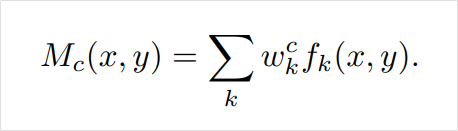

CAM은 이름에서 알 수 있듯이 클래스가 활성화되는 지도입니다.

CNN은 커널 윈도우에 따라 특성을 추출하여 만들어진 feature map에도 입력값의 위치 정보가 유지가 되기 때문에 이 정보를 가지고 이미지 검출이나 세그멘테이션등의 상황에 이용하기도 합니다.

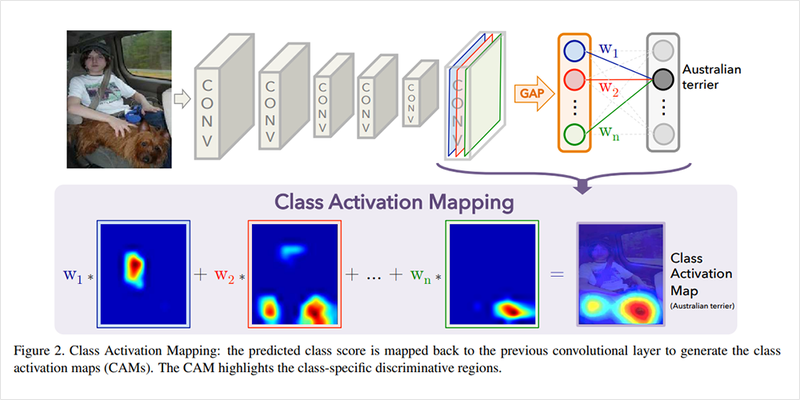


이제 위의 그림처럼 CAM이 어떻게 활용이 되는지를 설명해드리겠습니다.

먼저, CNN레이어를 거쳐 생성된 feature map에 GAP를 적용하고 소프트맥스 레이어(FC Layer without bias)를 적용합니다.

이렇게되면, feature map에 각 클래스에 대한 정보가 결과값의 형태로 여러 채널에 걸쳐 나타나게 되고, GAP을 이용하여 각 채널 정보를 요약하면, 소프트맥스 레이어가 이 정보를 통해서 개별 채널의 중요도를 결정합니다.

이런 식으로, 클래스별로 소프트맥스  레이어를 통해서 각 채널의 가중합을 구하면 각 클래스는 활성화 맵의 어떤 부분을 주로 활성화시키게 되는지 확인할 수 있습니다.

결과적으로, feature map = CNN의 출력값이 되고 보간 기법을 활용하여 원본 이미지 크기만 확대해주면 CAM을 얻을 수 있게 됩니다.

한 가지 단점이있다면, FC layer를 추가로 붙이고, 마지막에 CNN 레이어의 결과물만 시각화가 가능합니다.




---

## Grad-CAM

*수식

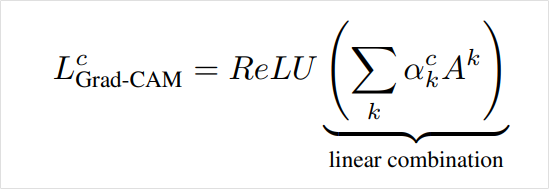

*마지막의 ReLU를 이용하는 것은 불필요한 음의 값을 줄일 수 있기 때문입니다.


Grad-CAM은 기존 CAM 모델 구조의 제한이 되는 문제를 해결하고 다양한 모델 구조를 해석할 수 있는 방법을 제시합니다.

이 방식을 사용하면 CNN기반 네트워크들이 굳이 모델 구조를 변경할 필요도 없고 비단 분류문제뿐만 아니라 다른 테스트에서도 유연한 대처 가능합니다.

*개와 고양이 이미지(Guided Backprop, Grad-CAM, Occlussion map의 시각화 비교 사진

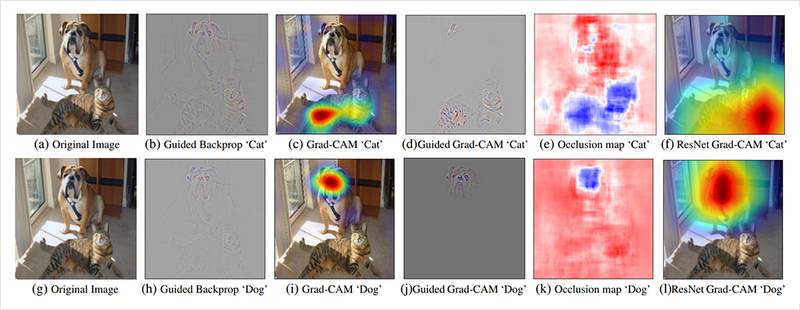


Grad-CAM은 높은 분별력과  큰 차원을 갖는 CAM을 만드는 것을 목표로 하고 있습니다.

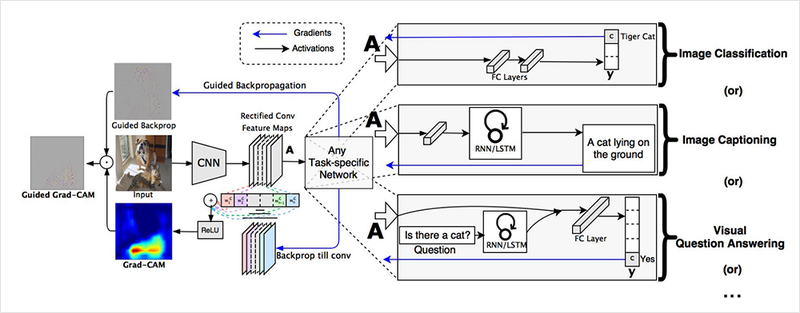

위의 이미지에 대해서 설명을 하면, 입력 이미지가 CNN을 거쳐서 feature map을 추출하고 그 후에 테스크를 따라서 다양한 레이어들이 사용이됩니다.


오른쪽의 Image classification 과 Image captioning, visual Q&A는 컴퓨터 비전 문제들을 설명합니다.

### Weight Score계산 (by 그래디언트)


원하는 클래스에 대해 관찰하는 레이어에게 들어오는 그래디언트를 구하면, 해당 클래스를 활성화할 때 어떤 채널이 레이어의 feature map에 중요하게 작용하는지 알 수 있게 됩니다.

수식으로 보면, 클래스에 대해 역전파를 통해서 k번째 채널의 그래디언트를 사용해 가중치 스코어를 구하는 식입니다.

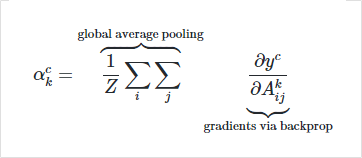

위의 식에서 알 수 있듯이 가중치를 구하기 위해서 CAM과 다르게 weight파라미터 도입할 필요가 없습니다.




## ACoL: Adversarial Complementary Learning


ACoL은 약지도학습 기법을 활용해서 물체 검출을 수행할 수 있게 됩니다.


### 약지도학습(weakly supervised learning)

학습 데이터 전체에 label이 달려 있을 때 사용 가능한 학습 방법으로  "A brief introduction to weakly supervised learning" 논문을 보면 세 가지 경우가 있습니다.

I) Incomplete supervision

학습 데이터 중 일부만 라벨이 달린 경우로 준지도학습과 같은 경우입니다.(예 고양이와 강아지 분류 학습 시 10000개 중 1000개만 라벨)

II) inexact supervision

학습데이터의 라벨이 정확하게 달려있지 않은 경우로 개나 고양이를 object detection 혹은 Semantic Segmentation을 해야하나 

정확한 bounding box가 없어서 이미지가 개인지 고양이인지의 데이터 정보만 라벨로 붙여있는 경우입니다.

III) inaccurate supervision

학습데이터에 노이즈가 있는 경우로 라벨이 잘못 달린 경우입니다.

우리가 다루는 논문은 두 번째(II)에 해당하는 경우입니다. 왜냐하면, 약지도학습을 통한 Object Detection and Semantic Segmentation할 것입니다.

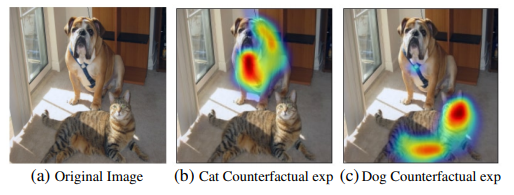

위의 이미지는 Grad-CAM을 이용한 Counterfactual Explanation예시로, 개와 고양이의 특징이 강한 곳은 가중치를 계산할 수 있습니다.

이 가중치 점수를 제거함ㄴ 클래스에 대한 예측이 바뀌고 그 부분들을 모으면 bounding box없이 object detection이 가능합니다. 

또한, Semantic Segmentation도 가능합니다

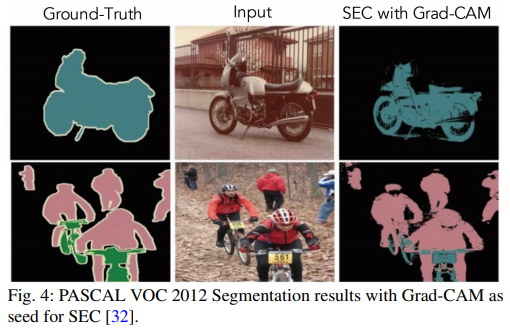


### Adversarial Complementary Learning




 ACoL은 모델 학습이 끝난 후에 두 브랜치로 나뉘게 되는데 이 두 브랜치는 CAM을 만들기 위해 활용했던 feature map입니다.

CAM 과 Grad-CAM은 feature map을 보면 가장자리보다 특징이 주로 나타나는 위치인 중점으로 활성화가 되어있는데

사실, 물체 검츨은 형태와 윤곽을 보고도 정확하게 구분해내는 것이 중요합니다.

그러므로 ACoL은 위의 두 방식과 다르게 브랜치를 두 가지로 두어서 높은 점수를 지우고 주변 특성을 반영하는 과정인 Adversial learning를 이용했습니다.

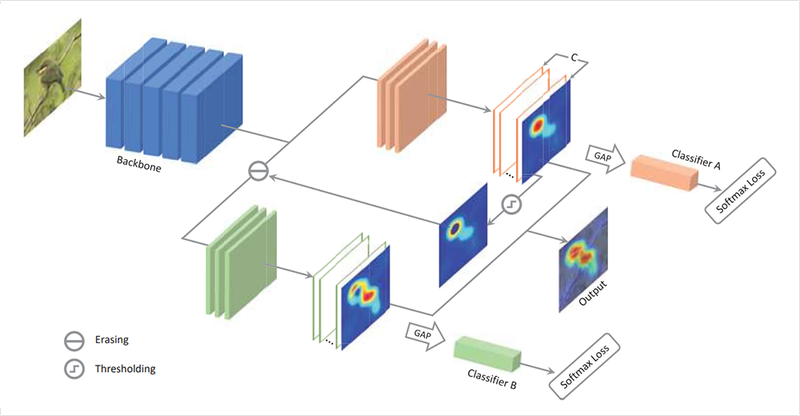

위의 이미지와 함께 자세히 ACoL의 구조를 살펴보면, 먼저 위쪽 주황색 브랜치를 거칩니다. 이렇게 되면, feature map은 GAP를 거쳐서 softmax layer(ClassifierA)거친 후에 loss로 학습이 됩니다.

ACoL은 이 feature map을 적대적인 방법으로 사용하여 일정 값 이상 활성화맵을 지웁니다.

즉, Classifier A는 전체적인 이미지를 보고 클래스를 판별하고 Classifier B는 A의 CAM에서 크게 활성화된 영역을 지운 부분을 분류해야하므로 더 어렵습니다.


결론적으로, Classifier A와 Classifier B를 학습시킴으로 통해서 더 넓은 영역을 판별 근거로 삼을 수 있게 됩니다.

이 과정을 통해 모델은 어찌보면 쉽게 맞출 수 있는 샘플을 어렵게 다시 학습하여 Adversarial Complementary Learning과정을 거치게 됩니다.

즉,  ACoL은 물체의 전반적인 영역으로 CAM이 활성화되는 효과를 볼 수 있습니다

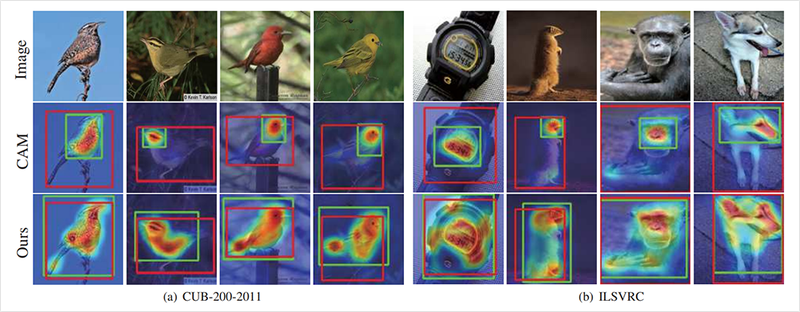


### 1x1 Conv

커널 사이즈: 1x1

출력 채널의 개수 = 분류하고자 하는 클래스 개수

위의 두 가지를 가진 1x1 conv_layer를 특성맵에 사용하고 GAP를 적용하여 NIN 논문의 구조랑 유사한 방식이 됩니다.

고로, 컨볼루션 레이어의 출력값은 활성화 맵이 되고
아래의 이미지는 활성화맵과 CAM비교 결과입니다.

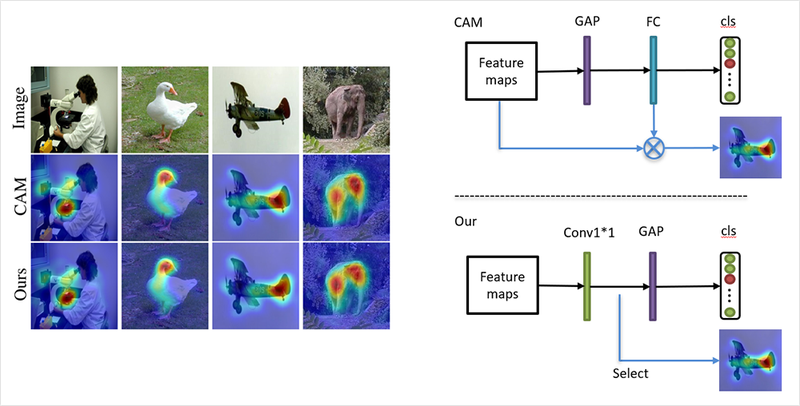